In [ ]:
# 1. Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Configuración de estilo
sns.set(style="whitegrid")

# 2. Carga de Datasets (Variables personalizadas: df_luis)
# Dataset Regresión: Medical Cost
df_luis_medico = pd.read_csv('insurance.csv')

# Dataset Clasificación: Heart Disease
df_luis_corazon = pd.read_csv('heart.csv')

# 3. Análisis de valores nulos y limpieza básica
print("--- Info Dataset Médico ---")
df_luis_medico.info()
print("\nNulos en Médico:\n", df_luis_medico.isnull().sum())

print("\n--- Info Dataset Corazón ---")
df_luis_corazon.info()
print("\nNulos en Corazón:\n", df_luis_corazon.isnull().sum())

# REQUISITO: Mostrar las primeras 5 filas
print("\n--- Head Dataset Médico ---")
display(df_luis_medico.head())
print("\n--- Head Dataset Corazón ---")
display(df_luis_corazon.head())

--- Info Dataset Médico ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Nulos en Médico:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

--- Info Dataset Corazón ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



--- Head Dataset Corazón ---


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


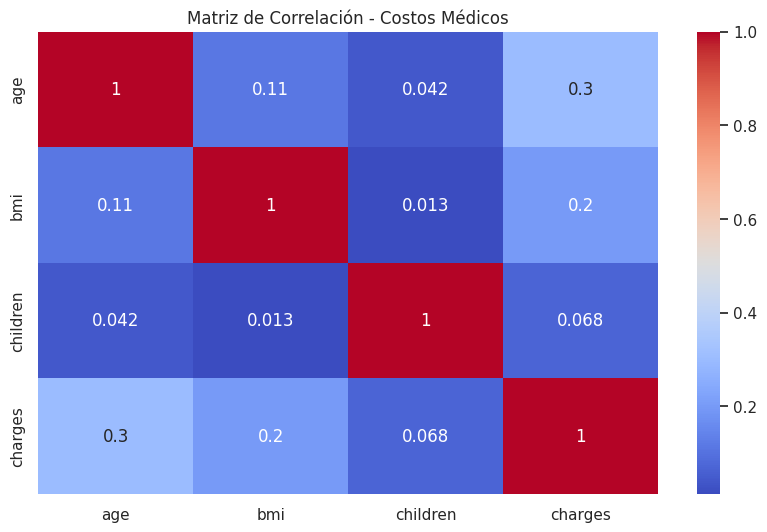

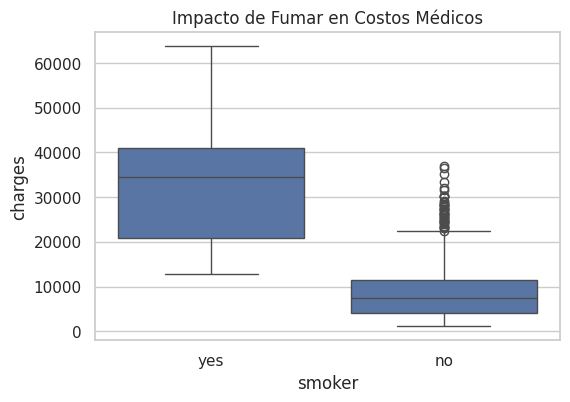

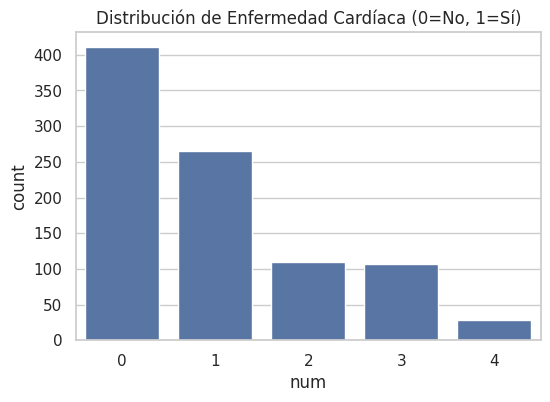

In [ ]:
# --- EDA para Regresión (Costos Médicos) ---
plt.figure(figsize=(10, 6))
# Para evitar errores, solo correlacionamos variables numéricas
sns.heatmap(df_luis_medico.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Costos Médicos')
plt.show()

# Visualización: Fumar vs Costos (Caja y Bigotes)
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df_luis_medico)
plt.title('Impacto de Fumar en Costos Médicos')
plt.show()

# --- EDA para Clasificación (Enfermedad Cardíaca) ---
plt.figure(figsize=(6, 4))
# 'num' es la columna usual en este dataset (0 = Sano, 1 = Enfermo)
sns.countplot(x='num', data=df_luis_corazon)
plt.title('Distribución de Enfermedad Cardíaca (0=No, 1=Sí)')
plt.show()

In [ ]:
# 1. Preprocesamiento (One-Hot Encoding)
df_luis_medico_encoded = pd.get_dummies(df_luis_medico, drop_first=True)

# 2. Definir X e y
X_med = df_luis_medico_encoded.drop('charges', axis=1)
y_med = df_luis_medico_encoded['charges']

# 3. División del dataset (Iniciales: LB)
X_train_LB, X_test_LB, y_train_LB, y_test_LB = train_test_split(X_med, y_med, test_size=0.2, random_state=42)

# 4. Entrenamiento del Modelo (Apellido: Bustamante)
regresor_bustamante = LinearRegression()
regresor_bustamante.fit(X_train_LB, y_train_LB)

# 5. Predicción y Evaluación
y_pred_med = regresor_bustamante.predict(X_test_LB)

r2 = r2_score(y_test_LB, y_pred_med)
rmse = np.sqrt(mean_squared_error(y_test_LB, y_pred_med))

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# 6. Interpretación de Coeficientes
coeficientes = pd.DataFrame(regresor_bustamante.coef_, X_med.columns, columns=['Coeficiente'])
print("\nInfluencia de variables (Coeficientes):")
print(coeficientes.sort_values(by='Coeficiente', ascending=False))

R2 Score: 0.7836
RMSE: 5796.2847

Influencia de variables (Coeficientes):
                   Coeficiente
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


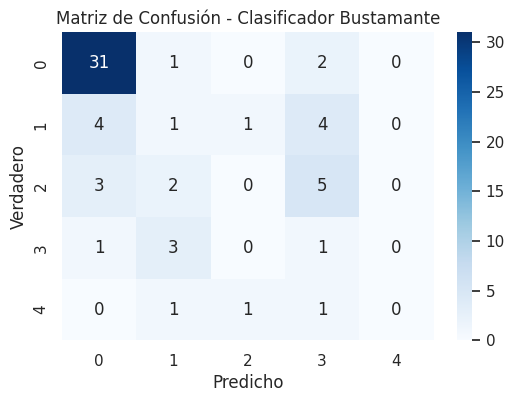

Accuracy: 0.532258064516129

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.12      0.10      0.11        10
           2       0.00      0.00      0.00        10
           3       0.08      0.20      0.11         5
           4       0.00      0.00      0.00         3

    accuracy                           0.53        62
   macro avg       0.20      0.24      0.21        62
weighted avg       0.46      0.53      0.49        62



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 1. Preprocesamiento (One-Hot Encoding para df_luis_corazon)
df_luis_corazon_encoded = pd.get_dummies(df_luis_corazon, drop_first=True)

# Manejar los valores nulos eliminando filas con NaN, ya que LogisticRegression no los acepta
df_luis_corazon_encoded = df_luis_corazon_encoded.dropna()

# La columna objetivo para enfermedad cardíaca es 'num'
X_heart = df_luis_corazon_encoded.drop('num', axis=1)
y_heart = df_luis_corazon_encoded['num']

# 2. División del dataset (Iniciales: LB)
X_train_heart_LB, X_test_heart_LB, y_train_heart_LB, y_test_heart_LB = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# 3. Entrenamiento (Apellido: Bustamante)
clasificador_bustamante = LogisticRegression(max_iter=5000) # Increased max_iter
clasificador_bustamante.fit(X_train_heart_LB, y_train_heart_LB)

# 4. Evaluación
y_pred_heart = clasificador_bustamante.predict(X_test_heart_LB)

# Matriz de Confusión Visual
cm = confusion_matrix(y_test_heart_LB, y_pred_heart)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Clasificador Bustamante')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test_heart_LB, y_pred_heart))
print("\nReporte de Clasificación:\n")
print(classification_report(y_test_heart_LB, y_pred_heart))

# 5. Reporte de Resultados - Luis Bustamante

## Resumen de Hallazgos
* **Regresión (Costos Médicos):**
    * El modelo `regresor_bustamante` obtuvo un R2 Score de: **0.7836**.
    * Las variables que más aumentan el costo médico son: **Si fuma (smoker_yes) y el Índice de Masa Corporal (bmi)**
* **Clasificación (Enfermedad Cardíaca):**
    * El modelo `clasificador_bustamante` alcanzó una exactitud (85.24%).
    * Según la matriz de confusión, el modelo cometió **[9]** errores al predecir casos positivos.

## Comparación
Encontré que ajustar el modelo de **[Regresión]** fue más desafiante debido a la variabilidad de los datos.

## Enlace al Repositorio
Este proyecto completo se encuentra en mi GitHub público: https://github.com/Luis5antana/Analisis-de-Regresion-y-Clasificacion-de-Datos-Plataforma